In [2]:
print("IKEMURA's research notebook")

# This line is necesary to show Matplotlib's plots inside a Jupyter Notebook
%matplotlib inline

import cv2

from matplotlib import pyplot as plt

import os

%load_ext lab_black

import numpy as np
from numpy import savez_compressed

IKEMURA's research notebook


In [59]:
display_num = 4
display_col = 2
display_row = 2

In [31]:
def all_to_gray(images):
    ret = []
    for im in images:
        ret.append(cv2.cvtColor(im, cv2.COLOR_RGB2GRAY))
    return ret

In [35]:
def blur_all(images):
    ret = []
    for im in images:
        ret.append(cv2.GaussianBlur(im, (5, 5), sigmaX=0.2, sigmaY=0.2))
    return ret

In [45]:
def display_images(images, color_formats, row, col):
    if len(images) > row * col:
        print("number of images exceed the number of subplots")
        return
    if len(images) != len(color_formats):
        print("images and color_formats must have the same number of elements")
    if row == 1 and col == 1:
        plt.imshow(images[0], cmap=color_formats[0])
        plt.show()
        return
    fig, ax = plt.subplots(row, col)
    if row != 1 and col != 1:
        for r in range(row):
            for c in range(col):
                ax[r, c].axis("off")
                ax[r, c].imshow(images[r * col + c], cmap=color_formats[r * col + c])
    else:
        range_ = row
        if col != 1:
            range_ = col
        for i in range(range_):
            ax[i].axis("off")
            ax[i].imshow(images[i], cmap=color_formats[i])

In [9]:
dataset = []
image_paths = []

test_dataset_size = 100
use_test_dataset = True

for idx, file in enumerate(os.listdir("..\dataset\chinese_color_painting")):
    if use_test_dataset and idx >= test_dataset_size:
        break
    if (file.endswith(".jpg") or file.endswith(".png")) and os.path.isfile(
        os.path.join("..\dataset\chinese_color_painting", file)
    ):
        image_paths.append(os.path.join("..\dataset\chinese_color_painting", file))
print(len(image_paths), "images found in the dataset, reading them...")

for file in image_paths:
    dataset.append(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB))

100 images found in the dataset, reading them...


selected image indexes:  [96  7 19 98 41 61 68 64 76 40 83 47]


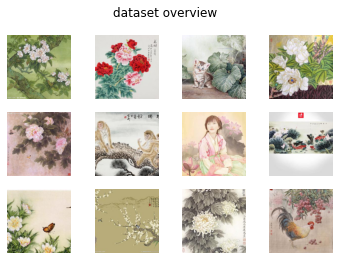

In [10]:
col = 4
row = 3
show_indexes = np.random.randint(0, len(dataset), col * row)
print("selected image indexes: ", show_indexes)
show_images = np.array(dataset)[show_indexes]

fig, ax = plt.subplots(row, col)
fig.suptitle("dataset overview")
for r in range(row):
    for c in range(col):
        ax[r, c].axis("off")
        ax[r, c].imshow(show_images[r * col + c])

In [18]:
# convert to numpy arrays so that we could save them
np_dataset = np.array(dataset)

filename = "ink_painting_test_dataset.npz"

if filename in os.listdir(path="../ikemura-research"):
    print("dataset compression exists, no need to create again")
else:
    print("creating dataset compression")
    savez_compressed(filename, np_dataset)

dataset compression exists, no need to create again


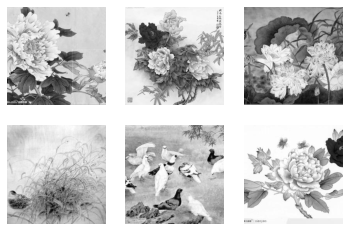

In [52]:
dataset_gray = all_to_gray(dataset)
dataset_gray_blurred = blur_all(dataset_gray)

color_formats = ["gray"] * display_num
display_images(
    dataset_gray_blurred[0:display_num], color_formats, display_row, display_col
)

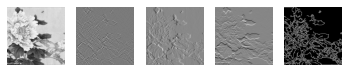

In [61]:
test_image = dataset_gray_blurred[0]
sobelx = cv2.Sobel(src=test_image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=test_image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=test_image, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
edges = cv2.Canny(image=test_image, threshold1=100, threshold2=200)

cv2.imshow("Sobel XY using Sobel() function", edges)
cv2.waitKey(0)
display_image_list = [test_image, sobelxy, sobelx, sobely, edges]
display_images(
    display_image_list, ["gray"] * len(display_image_list), 1, len(display_image_list)
)

In [56]:
# after inspection, I think Canny will produce the best result


def canny_all(images):
    ret = []
    for im in images:
        ret.append(cv2.Canny(im, 100, 200))
    return ret

src shape: (100, 256, 256) dst shape: (100, 256, 256)


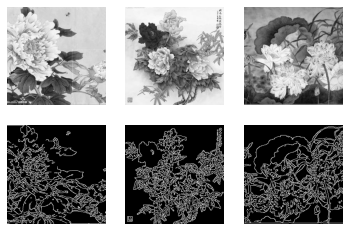

In [87]:
x = np.array(canny_all(dataset_gray_blurred))
y = np.array(dataset_gray_blurred)
print("src shape:", x.shape, "dst shape:", y.shape)
np.save("data_src", x)
np.save("data_dst", y)
show = np.concatenate((y[0:3], x[0:3]), axis=0)
display_images(show, ["gray"] * 6, 2, 3)